In [1]:
import pandas as pd
import numpy as np

In [2]:
diamonds_data = pd.read_csv("F:\\Datasets\\diamonds\\diamonds.csv")

In [3]:
data = diamonds_data.drop(columns = ['Unnamed: 0'])
#data = diamonds_data.drop(columns = ['Unnamed: 0','clarity','color'])
data = data.rename(columns = {"x":'length(mm)',"y": 'width(mm)',"z":'depth(mm)'})
data = data.sample(frac = 1)

In [4]:
data["clarity"] = np.where(data["clarity"] == "I1",0.1,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "IF",0.2,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "SI1",0.3,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "SI2",0.4,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "VS1",0.5,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "VS2",0.6,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "VVS1",0.7,data["clarity"])
data["clarity"] = np.where(data["clarity"] == "VVS2",0.8,data["clarity"])

In [5]:
data["cut"] = np.where(data["cut"] == "Fair",0,data["cut"])
data["cut"] = np.where(data["cut"] == "Good",1,data["cut"])
data["cut"] = np.where(data["cut"] == "Ideal",2,data["cut"])
data["cut"] = np.where(data["cut"] == "Premium",3,data["cut"])
data["cut"] = np.where(data["cut"] == "Very Good",4,data["cut"])

In [6]:
data["color"] = np.where(data["color"] == "D",0.1,data["color"])
data["color"] = np.where(data["color"] == "E",0.2,data["color"])
data["color"] = np.where(data["color"] == "F",0.3,data["color"])
data["color"] = np.where(data["color"] == "G",0.4,data["color"])
data["color"] = np.where(data["color"] == "H",0.5,data["color"])
data["color"] = np.where(data["color"] == "I",0.6,data["color"])
data["color"] = np.where(data["color"] == "J",0.7,data["color"])

In [7]:
whole_data = pd.concat([data.iloc[:,0].astype("float32") , data.iloc[:,2:].astype("float32")],axis = 1)
whole_data = whole_data.values
whole_data = whole_data/whole_data.max()

In [8]:
train_data = whole_data[:37758]
valid_data = whole_data[37758:48546]
test_data = whole_data[48546:]

In [9]:
whole_label = data.iloc[:,1].astype("int32")
whole_label = whole_label.values

In [10]:
train_label = whole_label[:37758]
valid_label = whole_label[37758:48546]
test_label = whole_label[48546:]

In [11]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [12]:
model = models.Sequential()
model.add(layers.Dense(1028,input_shape = (9,)))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(5, activation = "softmax"))

In [13]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [14]:
history = model.fit(train_data, train_label, epochs = 100,batch_size = 512, validation_data = (valid_data,valid_label))

Train on 37758 samples, validate on 10788 samples
Epoch 1/100
37758/37758 [==============================] - 12s 317us/step - loss: 1.4039 - accuracy: 0.3951 - val_loss: 1.3728 - val_accuracy: 0.3956
Epoch 2/100
37758/37758 [==============================] - 12s 324us/step - loss: 1.3587 - accuracy: 0.4008 - val_loss: 1.3696 - val_accuracy: 0.3965
Epoch 3/100
37758/37758 [==============================] - 11s 303us/step - loss: 1.3558 - accuracy: 0.4018 - val_loss: 1.3684 - val_accuracy: 0.3999
Epoch 4/100
37758/37758 [==============================] - 11s 297us/step - loss: 1.3552 - accuracy: 0.4015 - val_loss: 1.3666 - val_accuracy: 0.4010
Epoch 5/100
37758/37758 [==============================] - 11s 295us/step - loss: 1.3544 - accuracy: 0.4008 - val_loss: 1.3669 - val_accuracy: 0.3956
Epoch 6/100
37758/37758 [==============================] - 11s 302us/step - loss: 1.3535 - accuracy: 0.4018 - val_loss: 1.3650 - val_accuracy: 0.3956
Epoch 7/100
37758/37758 [=========================

Epoch 55/100
37758/37758 [==============================] - 15s 386us/step - loss: 1.3177 - accuracy: 0.4251 - val_loss: 1.3092 - val_accuracy: 0.4208
Epoch 56/100
37758/37758 [==============================] - 15s 386us/step - loss: 1.3054 - accuracy: 0.4302 - val_loss: 1.3638 - val_accuracy: 0.4173
Epoch 57/100
37758/37758 [==============================] - 15s 397us/step - loss: 1.3268 - accuracy: 0.4272 - val_loss: 1.3459 - val_accuracy: 0.4057
Epoch 58/100
37758/37758 [==============================] - 16s 421us/step - loss: 1.3013 - accuracy: 0.4326 - val_loss: 1.2538 - val_accuracy: 0.4880
Epoch 59/100
37758/37758 [==============================] - 14s 372us/step - loss: 1.3120 - accuracy: 0.4375 - val_loss: 1.3363 - val_accuracy: 0.3889
Epoch 60/100
37758/37758 [==============================] - 16s 417us/step - loss: 1.2938 - accuracy: 0.4432 - val_loss: 1.3284 - val_accuracy: 0.4171
Epoch 61/100
37758/37758 [==============================] - 14s 368us/step - loss: 1.2661 - ac

In [15]:
import matplotlib.pylab as plt

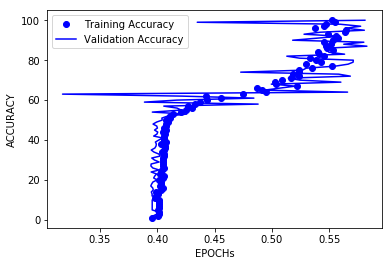

In [17]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = len(acc) + 1
plt.plot(acc,range(1,epochs),"bo",label = "Training Accuracy")
plt.plot(val_acc,range(1,epochs),"b",label = "Validation Accuracy")
plt.xlabel("EPOCHs")
plt.ylabel("ACCURACY")
plt.legend()

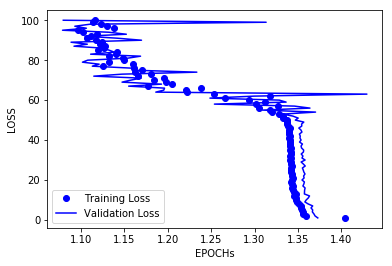

In [18]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = len(loss) + 1
plt.plot(loss,range(1,epochs),"bo",label = "Training Loss")
plt.plot(val_loss,range(1,epochs),"b",label = "Validation Loss")
plt.xlabel("EPOCHs")
plt.ylabel("LOSS")
plt.legend()